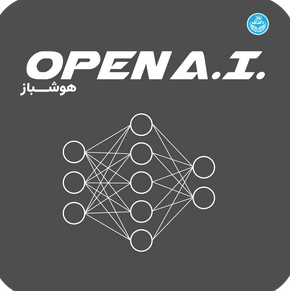

<!-- <img src="../assets/logo3.png" width="200" height="200" > -->

<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>Day1 - HandsOn</b></font><br>
        <hr/>

</div>

<pre>
.
├── Step 1: Import necessary libraries and load the dataset
│
├── Step 2: Understand the dataset and perform exploratory data analysis (EDA)
│
├── Step 3: Visualization
│ 
├── Step 4: Split the dataset into features (X) and target variable (y)
│ 
├── Step 5: Split the dataset into training and test sets
│
├── Step 6: Running the KNN algorithm on the dataset
│
├── Step 7: Checking the output of the algorithm
│
├── Step 8: Checking the effect of dimension normalization on the model's performance
│
├── Step 9: Comparing the accuracy before and after normalization
│
├── Step 10: Checking the effect of model parameters
│
└── Step 11: Checking the types of distance functions

</pre>

# Part 1

## Step 1: Import necessary libraries and load the dataset


* In this step, we import the necessary libraries such as NumPy, Pandas, Matplotlib, Seaborn, and the breast cancer dataset from scikit-learn.
* The breast cancer dataset contains information about various features computed from digitized images of breast mass samples.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

## Step 2: Understand the dataset and perform exploratory data analysis (EDA)

* We will use the Breast Cancer dataset for this example.
* The load_breast_cancer function loads the dataset.

* In this step, we create a DataFrame from the feature data of the breast cancer dataset.
* We add the target variable (diagnosis) to the DataFrame.
* The first few rows of the DataFrame are displayed to get an initial understanding of the data.
* We check the shape of the DataFrame to see the number of rows and columns.
* Missing values are checked to ensure the data is complete.
* We visualize the distribution of the target variable using a countplot.
* The correlation between features is computed and visualized using a heatmap.

In [3]:
# Load dataset
data = load_breast_cancer()

### About the dataset


The Breast Cancer dataset used in the code is a popular benchmark dataset for binary classification tasks. It is available in scikit-learn and contains measurements of various features computed from digitized images of breast mass samples. The goal is to classify whether a given sample is benign (non-cancerous) or malignant (cancerous).

Here's some information about the Breast Cancer dataset:

* Number of Instances: 569
* Number of Features: 30
* Target Variable: Diagnosis (Benign or Malignant)
* Benign: Represented by 0
* Malignant: Represented by 1



### Create a DataFrame with the feature data

In [43]:
df = pd.DataFrame(data.data)

### Add the target variable to the DataFrame

In [48]:
df['target'] = pd.Series(data.target)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,target,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,0


### Check the first few rows of the DataFrame


* Let's take a look at the first few rows of the dataset to understand its structure and contents.

* This will help us get a sense of the data we are working with.

* Display the first few rows of the dataset

In [49]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,target,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,0


### Check the shape of the DataFrame


In [50]:
df.shape

(569, 32)

### Check for missing values

In [51]:
df.isna().sum().sum()

0

### Check the distribution of the target variable


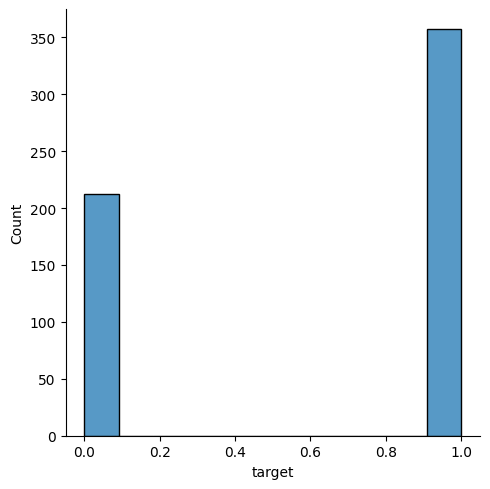

In [52]:
sns.displot(df.target)

### Check the correlation between features

<AxesSubplot:>

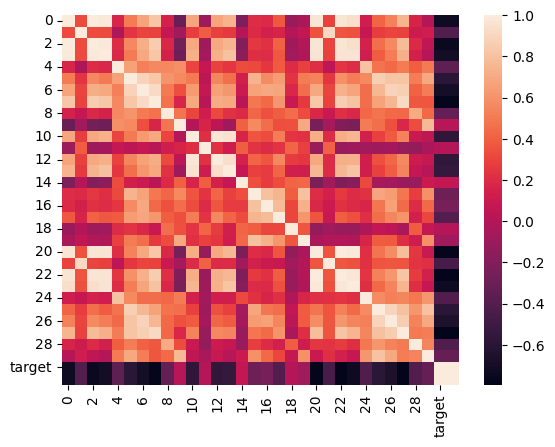

In [53]:
df.corr()
sns.heatmap(df.corr())

## Step 3: Visualization

### Perform a scatter plot to visualize two features

* To visualize the relationship between two features, convert the dataset to a DataFrame using pd.DataFrame(data.data, columns=data.feature_names) and assign the target values using df['target'] = data.target.
* Define the two features (mean radius and mean texture) that you want to visualize by setting the variables feature1 and feature2.
* Create a scatter plot using plt.scatter to plot the two features against each other. The color of each point represents the target variable (target) using the c parameter and a cool-warm colormap.
* Finally, add labels and a title to the plot for better understanding and visualization.

Text(0.5, 1.0, 'mean radius & mean texture')

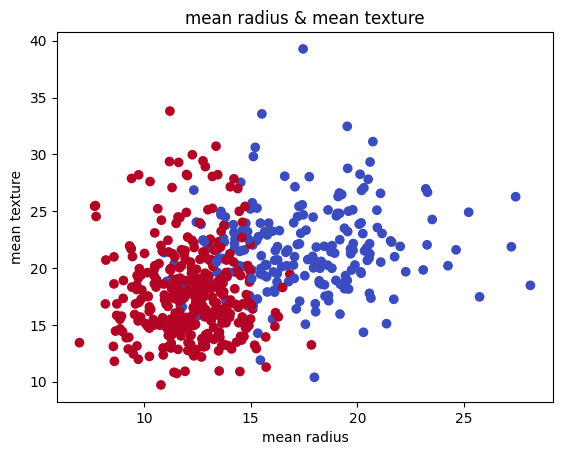

In [70]:
# Convert the dataset to a DataFrame
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Define the features to visualize
mean_radius = df['mean radius']
mean_texture = df['mean texture']

# Create a scatter plot
plt.scatter(mean_radius, mean_texture, c=df['target'], cmap='coolwarm')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title('mean radius & mean texture')




### Create a boxplot to compare the distribution of a feature by target class

* To compare the distribution of a feature based on target class, import the seaborn library using import seaborn as sns.
* Specify the feature you want to analyze by setting the variable feature to 'mean area'.
* Create a boxplot using sns.boxplot, where the x-axis represents the target variable (target), and the y-axis represents the feature values.
* Add labels and a title to the plot to provide clear information about the visualization.


Text(0.5, 1.0, 'boxplot for mean area')

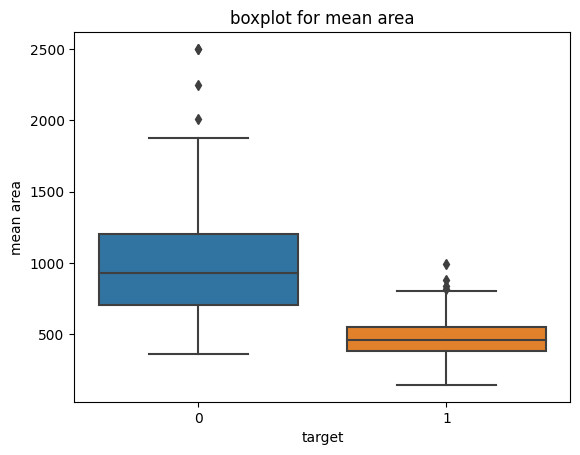

In [89]:
# Import the necessary library
import seaborn as sns



# Define the feature for boxplot
mean_area = df['mean area']

# Create a boxplot
sns.boxplot(data=df, x='target', y=mean_area)
plt.title('boxplot for mean area')

### Visualize the distribution of a feature by target class using a histogram

* To visualize the distribution of a feature based on target class, specify the feature you want to analyze by setting the variable feature to 'mean smoothness'.
* Create a histogram using sns.histplot. The feature values will be represented on the x-axis, and the frequency of occurrence will be represented on the y-axis. The histogram bars will be overlaid with a KDE (kernel density estimation) curve.
* Add labels and a title to the plot to provide clear information

Text(0.5, 1.0, 'mean smoothness frequency')

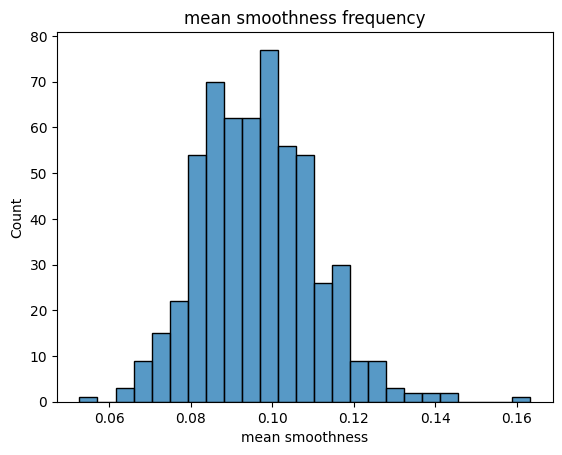

In [91]:
# Define the feature for histogram
mean_smoothness = df['mean smoothness']

# Create a histogram with KDE
sns.histplot(data=df, x=mean_smoothness, stat='count')
plt.title('mean smoothness frequency')

## Step 4: Split the dataset into features (X) and target variable (y)

* In machine learning, we typically split the dataset into features (input variables) and a target variable (output variable).
* The features are the attributes or characteristics of the data that we will use to make predictions.
* The target variable is the variable we want to predict.

* Split the dataset into features (X) and target variable (y)


In [93]:

# you also can use df for spilt dataset by drop().
X = data.data
y = data.target

## Step 5: Split the dataset into training and test sets

* It is important to evaluate our machine learning model on data it has never seen before.
* Therefore, we split the dataset into a training set and a test set.
* The training set will be used to train the model, and the test set will be used to evaluate its performance.

* Split the dataset into training and test sets


In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

___________

# Part 2

## Step 6: Running the KNN algorithm on the dataset

* Creating a KNN classifier
* fitting it to the training data
* making predictions on the test data.



In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn.predict(X_test)

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

## Step 7: Checking the output of the algorithm

* Printing the predicted labels to see the output of the KNN algorithm.




In [111]:
print(knn.predict(X_test))
print(knn.score(X_test, y_test))

[0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1
 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1
 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1]
0.951048951048951


## Step 8: Checking the effect of normalization on the model's performance

* Normalizing the feature variables using StandardScaler to improve the model's performance.



In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_normal = scaler.transform(X_train)
X_test_normal = scaler.transform(X_test)

knn_normal = KNeighborsClassifier()
knn_normal.fit(X_train_normal, y_train)

print(knn_normal.predict(X_test_normal))
print(knn_normal.score(X_test_normal, y_test))

[1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1
 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1
 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1
 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1]
0.986013986013986


## Step 9: Comparing the accuracy before and after normalization


In [116]:
print("Before:", knn.score(X_test, y_test))

print("After:", knn_normal.score(X_test_normal, y_test))


Before: 0.951048951048951
After: 0.986013986013986


## Step 10: Checking the effect of model parameters

* Varying the number of neighbors (k) to observe its effect on the model's accuracy.


In [124]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

knn.predict(X_test)

knn.score(X_test, y_test)

0.958041958041958

## Step 11: Checking the types of distance functions
* Varying the distance metric used by the KNN algorithm to observe its effect on accuracy.



In [144]:

distance_functions = ['euclidean', 'manhattan', 'chebyshev']

knn1 = KNeighborsClassifier(metric='euclidean')
knn1.fit(X_train, y_train)
knn1.predict(X_test)
print(knn1.score(X_test, y_test))

knn2 = KNeighborsClassifier(metric='manhattan')
knn2.fit(X_train, y_train)
knn2.predict(X_test)
print(knn2.score(X_test, y_test))

knn3 = KNeighborsClassifier(metric='chebyshev')
knn3.fit(X_train, y_train)
knn3.predict(X_test)
print(knn3.score(X_test, y_test))

knn4 = KNeighborsClassifier(metric='minkowski', p=3)
knn4.fit(X_train, y_train)
knn4.predict(X_test)
print(knn4.score(X_test, y_test))

0.951048951048951
0.965034965034965
0.9440559440559441
0.951048951048951
